Instancias e atributos
(340, 16)

Resultados baseados em Holdout 70/30
Taxa de acerto = 0.16 
Matriz de confusão:
[[0 0 0 0 0 0 0 0 0 0 0 0 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 3 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 3 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 

/home/bertho/Music/Piton/MachineLearning/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
/home/bertho/Music/Piton/MachineLearning/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


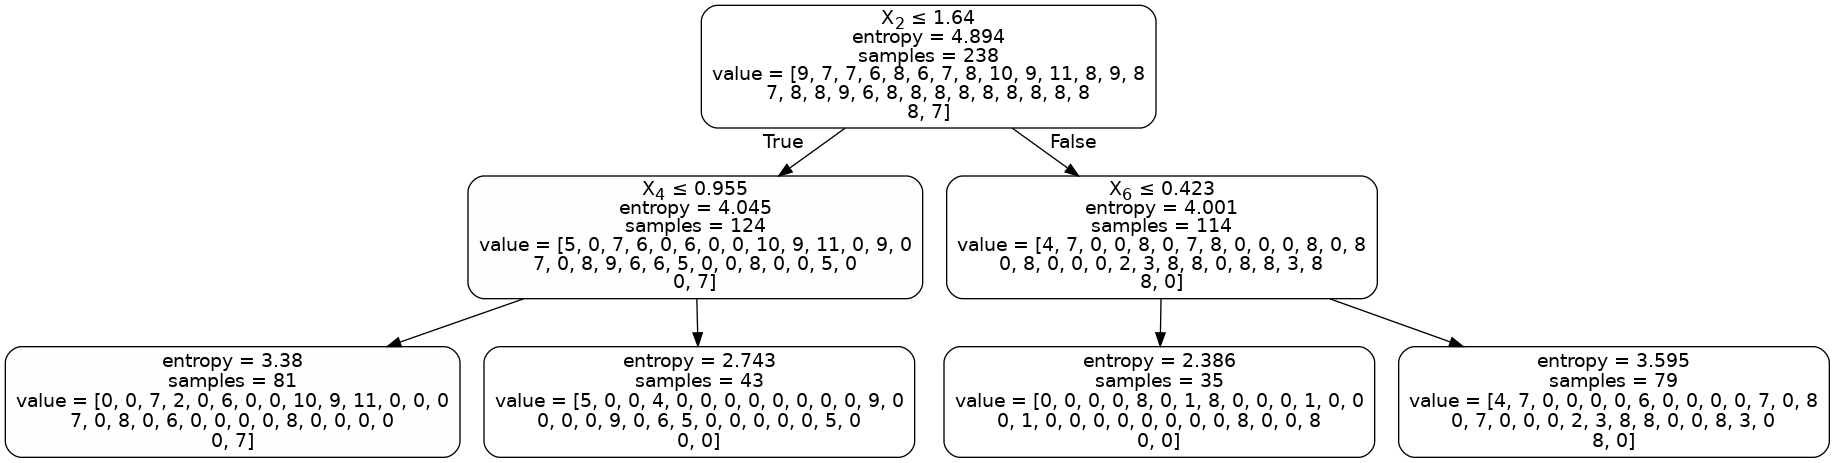

In [5]:
# Este exemplo carrega a base Wine da UCI, treina uma Arvore de decisao usando 
# holdout e outra usando validacao cruzada com 10 pastas. 

# Importa bibliotecas necessarias
from io import StringIO

import numpy as np
import urllib.request
from sklearn import tree
from sklearn import  model_selection
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from IPython.display import Image  
from IPython.display import display
from sklearn.metrics import f1_score
import pydotplus
 
# Exemplo carrega a base Wine
# url = "http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
# raw_data = urllib.request.urlopen(url)
raw_data = open('./leaf.csv', 'r')


# Carrega arquivo como uma matriz
dataset = np.loadtxt(raw_data, delimiter=",")

# Imprime quantide de instancias e atributos da base
print("Instancias e atributos")
print(dataset.shape)

# Coloca em X os 13 atributos de entrada e em y as classes
# Observe que na base Wine a classe eh primeiro atributo 
X = dataset[:,1:13]
y = dataset[:,0]

# EXEMPLO USANDO HOLDOUT
# Holdout -> dividindo a base em treinamento (70%) e teste (30%), estratificada
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3, random_state=42, stratify=y)

# declara o classificador
clfa = tree.DecisionTreeClassifier(criterion='entropy', max_depth=2)
# criterion = estrategia utilizada para calcular a importancia de cada atribuito (entropia ou gini)
# max_depth = limita a profundidade da árvore (poda)
# min_samples_Split = número mínimo de instancias para realizar um split(poda)
# min_samples_leaf = numero minimo de instancias para justificar a criação de uma folha (poda)

# treina o classificador
clfa = clfa.fit(X_train, y_train)

# testa usando a base de testes
predicted=clfa.predict(X_test)

# calcula a acuracia na base de teste (taxa de acerto)
score=clfa.score(X_test, y_test)

# calcula a matriz de confusao
matrix = confusion_matrix(y_test, predicted)

# apresenta os resultados
print("\nResultados baseados em Holdout 70/30")
print("Taxa de acerto = %.2f " % score)
print("Matriz de confusão:")
print(matrix)

# EXEMPLO USANDO VALIDACAO CRUZADA
clfb = tree.DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=3)
folds=5
result = model_selection.cross_val_score(clfb, X, y, cv=folds)

print("\nResultados baseados em Validacao Cruzada")
print("Qtde folds: %d:" % folds)
print("Taxa de Acerto: %.2f" % result.mean())
print("Desvio padrao: %.2f" % result.std())

# matriz de confusão da validacao cruzada
Z = model_selection.cross_val_predict(clfb, X, y, cv=folds)
cm=confusion_matrix(y, Z)
print("Matriz de confusão:")
print(cm)

#imprime a arvore gerada
print("\nÁrvore gerada no experimento baseado em Holdout")
dot_data = StringIO()
export_graphviz(clfa, out_file=dot_data, filled=True, rounded=True, special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
im=Image(graph.create_png())
display(im)